In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))  # or the full path to the "project" directory
import numpy as np
import gpbr

In [2]:
def f1(x, t):
    return 0

def f2(x: np.array, t: float) -> np.array:
    return (t**2)*np.exp(-4*t+2)*np.abs(x)

In [3]:
T = 2 # final time
N = 9 # N+1=10 time points
# M = 64 # number of collocation points
M = 8 # number of collocation points

In [4]:
tn = np.array([(n+1)*(T/(N+1)) for n in range(-1, N+1)])
h = T/(N+1)

In [5]:
tn

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [6]:
nu = np.sqrt(2/h)
nu

np.float64(3.1622776601683795)

In [7]:
betta_array = []
for n in range(0, N+1):
    sign = (-1)**n
    betta_array.append(sign*(4/h))
betta_array

[20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0]

In [8]:
from gpbr.gpbr.mfs.data import MfSData
mfs_data =MfSData(N, T, tn, M, betta_array, nu)

In [9]:
mfs_data

MfSData(N=9, T=2, tn=array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]), M=8, Beta=[20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0, 20.0, -20.0], nu=np.float64(3.1622776601683795))

In [10]:
from gpbr.gpbr.collocation import collocation_points_2d, CollocationData2D
coll_2d = collocation_points_2d(M, startpoint=False)
coll_2d

CollocationData2D(n=8, theta=array([0.78539816, 1.57079633, 2.35619449, 3.14159265, 3.92699082,
       4.71238898, 5.49778714, 6.28318531]))

In [11]:
from gpbr.gpbr.boundary import StarlikeCurve, starlike_circle_base, starlike_curve
point_circle = starlike_circle_base(coll_2d)

g1_r_values = np.ones(coll_2d.n)*2
Gamma1 = starlike_curve(g1_r_values, point_circle)

g2_r_values = np.ones(coll_2d.n)*3
Gamma2 = starlike_curve(g2_r_values, point_circle)

In [12]:
from gpbr.gpbr.source import SourcePoints2D, source_points_2d
source_coll_2d = collocation_points_2d(M//2, startpoint=False)
source_coll_2d
source_point_circle = starlike_circle_base(source_coll_2d)
eta1 = 0.5
eta2 = 2


g1_source_r_values = np.ones(source_coll_2d.n)*2
Gamma1_source = starlike_curve(g1_source_r_values, source_point_circle)

g2_source_r_values = np.ones(source_coll_2d.n)*3
Gamma2_source = starlike_curve(g2_source_r_values, source_point_circle)

source_points = source_points_2d(eta1, eta2, Gamma1_source, Gamma2_source)

In [13]:
## Plot
import matplotlib.pyplot as plt
def plot_2d(G1: StarlikeCurve, G2: StarlikeCurve, artG1: StarlikeCurve, artG2: StarlikeCurve):
    fig_plot, ax_plot = plt.subplots()
    ax_plot.plot(G1.x, G1.y, 'b--')
    ax_plot.plot(G2.x, G2.y, 'r--')
    ax_plot.plot(artG1.x, artG1.y, 'bo')
    ax_plot.plot(artG2.x, artG2.y, 'ro')

    ax_plot.axis('equal')
    plt.grid()
    plt.show()
    plt.close()


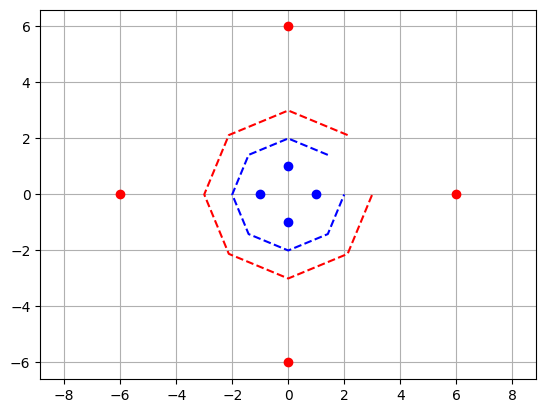

In [14]:
plot_2d(Gamma1, Gamma2, source_points.gart1, source_points.gart2)

In [15]:
from gpbr.gpbr.mfs.polynomial import MFSPolinomials2D, calculate_2d_polinomials

mfs_polynomyals = calculate_2d_polinomials(mfs_data, N)

Calclucate fundamental sequences in points

In [37]:
from gpbr.gpbr.mfs.fundamental_sequence import fs_2d
def calc_fs(n: int, M: int, Gamma: StarlikeCurve, source_points: SourcePoints2D, mfs_data: MfSData, mfs_poly: MFSPolinomials2D) -> np.ndarray:
    phi_vals = np.empty((M, M), dtype=np.float64)
    phi_vals[:] = np.nan
    for i in range(1, M+1):
        for j in range(1, M+1):
            artx, arty = source_points.get_point(j-1)
            delta = np.sqrt((Gamma.x[i-1]-artx)**2 + (Gamma.y[i-1]-arty)**2 )
            phi_vals[i-1, j-1] = fs_2d(n,delta, mfs_data.nu, mfs_poly)
    return phi_vals

In [38]:
phi_matrices_gamma1 = []
for n in range(0, N+1): # 10 time points
    phi_vals = calc_fs(n, M, Gamma1, source_points, mfs_data, mfs_polynomyals)
    print(f"n={n}")
    phi_matrices_gamma1.append(phi_vals)

n=0
n=1
n=2
n=3
n=4
n=5
n=6
n=7
n=8
n=9


In [39]:
phi_matrices_gamma2 = []
for n in range(0, N+1): # 10 time points
    phi_vals = calc_fs(n, M, Gamma2, source_points, mfs_data, mfs_polynomyals)
    print(f"n={n}")
    phi_matrices_gamma2.append(phi_vals)

n=0
n=1
n=2
n=3
n=4
n=5
n=6
n=7
n=8
n=9


In [40]:
alpha_coeeff = np.empty((N+1, M), dtype=np.float64)
alpha_coeeff[:] = np.nan
alpha_coeeff

array([[nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan]])

In [42]:
F = np.empty((2*M, 1), dtype=np.float64)
F[:] = np.nan
F

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [43]:
def f1(x, t):
    return 0

def f2(x: np.array, t: float) -> np.array:
    delta = np.sqrt(x[0]**2 + x[1]**2)
    return (t**2)*np.exp(-4*t+2)*delta

In [44]:
n = 0 # t=0
for i in range(1, M+1):
    F[i-1] = f1([Gamma1.x[i-1], Gamma1.y[i-1]], tn[n])

    F[M+i-1] = f2([Gamma2.x[i-1], Gamma2.y[i-1]], tn[n])

In [45]:
F

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [47]:
Phi0_gamma1 = phi_matrices_gamma1[n]
Phi0_gamma2 = phi_matrices_gamma2[n]

In [48]:
Phi0_gamma1

array([[5.36333947e-03, 5.97378306e-05, 5.97378306e-05, 5.36333947e-03,
        8.19231904e-08, 1.09889880e-11, 1.09889880e-11, 8.19231904e-08],
       [2.88157314e-02, 3.93723287e-04, 3.04768970e-05, 3.93723287e-04,
        1.12061493e-06, 5.74123782e-10, 2.55582981e-12, 5.74123782e-10],
       [5.36333947e-03, 5.36333947e-03, 5.97378306e-05, 5.97378306e-05,
        8.19231904e-08, 8.19231904e-08, 1.09889880e-11, 1.09889880e-11],
       [3.93723287e-04, 2.88157314e-02, 3.93723287e-04, 3.04768970e-05,
        5.74123782e-10, 1.12061493e-06, 5.74123782e-10, 2.55582981e-12],
       [5.97378306e-05, 5.36333947e-03, 5.36333947e-03, 5.97378306e-05,
        1.09889880e-11, 8.19231904e-08, 8.19231904e-08, 1.09889880e-11],
       [3.04768970e-05, 3.93723287e-04, 2.88157314e-02, 3.93723287e-04,
        2.55582981e-12, 5.74123782e-10, 1.12061493e-06, 5.74123782e-10],
       [5.97378306e-05, 5.97378306e-05, 5.36333947e-03, 5.36333947e-03,
        1.09889880e-11, 1.09889880e-11, 8.19231904e-08, 8.

In [49]:
Phi0_gamma2

array([[2.26965116e-04, 2.35672467e-06, 2.35672467e-06, 2.26965116e-04,
        2.81901400e-07, 7.18403463e-13, 7.18403463e-13, 2.81901400e-07],
       [8.76657303e-04, 1.77800623e-05, 1.12061493e-06, 1.77800623e-05,
        3.04768970e-05, 1.65759362e-10, 1.02053039e-13, 1.65759362e-10],
       [2.26965116e-04, 2.26965116e-04, 2.35672467e-06, 2.35672467e-06,
        2.81901400e-07, 2.81901400e-07, 7.18403463e-13, 7.18403463e-13],
       [1.77800623e-05, 8.76657303e-04, 1.77800623e-05, 1.12061493e-06,
        1.65759362e-10, 3.04768970e-05, 1.65759362e-10, 1.02053039e-13],
       [2.35672467e-06, 2.26965116e-04, 2.26965116e-04, 2.35672467e-06,
        7.18403463e-13, 2.81901400e-07, 2.81901400e-07, 7.18403463e-13],
       [1.12061493e-06, 1.77800623e-05, 8.76657303e-04, 1.77800623e-05,
        1.02053039e-13, 1.65759362e-10, 3.04768970e-05, 1.65759362e-10],
       [2.35672467e-06, 2.35672467e-06, 2.26965116e-04, 2.26965116e-04,
        7.18403463e-13, 7.18403463e-13, 2.81901400e-07, 2.

In [52]:
PHI_MAT = np.concatenate((Phi0_gamma1, Phi0_gamma2), axis=0)

In [54]:
PHI_MAT.shape

(16, 8)

In [55]:
from numpy.linalg import lstsq
PHI_MAT = np.concatenate((Phi0_gamma1, Phi0_gamma2), axis=0)
res = lstsq(PHI_MAT, F)

In [56]:
res

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([0.]),
 np.int32(8),
 array([3.15727274e-02, 2.97609598e-02, 2.97609598e-02, 2.80713991e-02,
        3.04379457e-05, 3.04337557e-05, 3.04337557e-05, 3.04292584e-05]))

In [60]:
alpha_coeeff

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan]])

In [62]:
F = np.empty((2*M, 1), dtype=np.float64)
F[:] = np.nan
F

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [102]:
n = 5 # t=0.2
for i in range(1, M+1):
    right_sum = 0
    for m in range(0, n): # m in [0,...,n-1]
        for j in range(1, M+1):
            phi_index = n-m
            phi_g1 = phi_matrices_gamma1[phi_index]
            right_sum += alpha_coeeff[m, j-1]*phi_g1[i-1, j-1]
    F[i-1] = f1([Gamma1.x[i-1], Gamma1.y[i-1]], tn[n]) - right_sum
    
    right_sum = 0
    for m in range(0, n): # m in [0,...,n-1]
        for j in range(1, M+1):
            phi_index = n-m
            phi_g2 = phi_matrices_gamma2[phi_index]
            right_sum += alpha_coeeff[m, j-1]*phi_g2[i-1, j-1]
    F[M+i-1] = f2([Gamma2.x[i-1], Gamma2.y[i-1]], tn[n]) - right_sum

In [103]:
F

array([[  1.25361916],
       [  8.18760569],
       [  1.25361916],
       [  8.18760569],
       [  1.25361916],
       [  8.18760569],
       [  1.25361916],
       [  8.18760569],
       [  4.21721652],
       [220.29656909],
       [  4.21721652],
       [220.29656909],
       [  4.21721652],
       [220.29656909],
       [  4.21721652],
       [220.29656909]])

In [104]:
from numpy.linalg import lstsq
PHI_MAT = np.concatenate((Phi0_gamma1, Phi0_gamma2), axis=0)
res = lstsq(PHI_MAT, F)

In [105]:
res

(array([[3.17395366e+00],
        [3.17395366e+00],
        [3.17395366e+00],
        [3.17395366e+00],
        [7.22821332e+06],
        [7.22821332e+06],
        [7.22821332e+06],
        [7.22821332e+06]]),
 array([0.08463917]),
 np.int32(8),
 array([3.15727274e-02, 2.97609598e-02, 2.97609598e-02, 2.80713991e-02,
        3.04379457e-05, 3.04337557e-05, 3.04337557e-05, 3.04292584e-05]))

In [106]:
alpha_coeeff[5,:] = res[0].T

In [107]:
alpha_coeeff

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.94448387e-01, -2.94448387e-01, -2.94448387e-01,
        -2.94448387e-01,  1.33113796e+04,  1.33113796e+04,
         1.33113796e+04,  1.33113796e+04],
       [-6.43977617e-01, -6.43977617e-01, -6.43977617e-01,
        -6.43977617e-01, -1.22115180e+05, -1.22115180e+05,
        -1.22115180e+05, -1.22115180e+05],
       [ 1.20535392e+00,  1.20535392e+00,  1.20535392e+00,
         1.20535392e+00,  6.19554659e+05,  6.19554659e+05,
         6.19554659e+05,  6.19554659e+05],
       [-1.65881173e+00, -1.65881173e+00, -1.65881173e+00,
        -1.65881173e+00, -2.32579550e+06, -2.32579550e+06,
        -2.32579550e+06, -2.32579550e+06],
       [ 3.17395366e+00,  3.17395366e+00,  3.17395366e+00,
         3.17395366e+00,  7.22821332e+06,  7.22821332e+06,
         7.22821332e+06,  7.22821332e+06],
       [            nan,          

In [ ]:
for i in range(0, N+1):
    alpha_coeeff[n, i] = res[0][i]

Calculate righhand side of matrices

In [ ]:
for i in range(1, M+1):
    for j in range(1, M+1):
        artx, arty = source_points.get_point(j-1)
        delta = np.sqrt((Gamma.x[i-1]-artx)**2 + (Gamma.y[i-1]-arty)**2 )
        phi_vals[i-1, j-1] = fs_2d(n,delta, mfs_data.nu, mfs_poly)

In [20]:
from gpbr.gpbr.mfs.fundamental_sequence import fs_2d
## l = 0 (inner boundary)
n = 0
phi0_vals = []
i = 1
for j in range(1, M+1):
    artx, arty = source_points.get_point(j-1)
    delta = np.sqrt((Gamma1.x[i-1]-artx)**2 + (Gamma1.y[i-1]-arty)**2 )
    phi0_vals.append(fs_2d(n,delta, mfs_data.nu, mfs_polynomyals))

In [22]:
phi0_vals - phi0[0]

array([0., 0., 0., 0., 0., 0., 0., 0.])